In [1]:
import numpy as np, healpy as hp, pickle, curvedsky as cs, sys
from matplotlib.pyplot import *
import local, tools_cmb
import binning, plottools as pl

/global/homes/t/toshiyan/Work/Lib/actlib/actsims/actsims/noise.py:9: UserWarning: No pyfftw found. Using much slower numpy fft engine.
  if 'fftw' not in pfft.engine: warnings.warn("No pyfftw found. Using much slower numpy fft engine.")


In [2]:
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/actsims/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/soapack/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/orphics/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/tilec/")
from pixell import enmap
from soapack import interfaces

In [3]:
qids = ['boss_d01','boss_01','boss_d02','boss_02','boss_d03','boss_03','boss_d04','boss_04','s16_d01','s16_d02','s16_d03']
#qids = ['boss_d01']

In [4]:
aobj = {q: local.init_analysis_params(qid=q,ascale=2.) for q in qids}

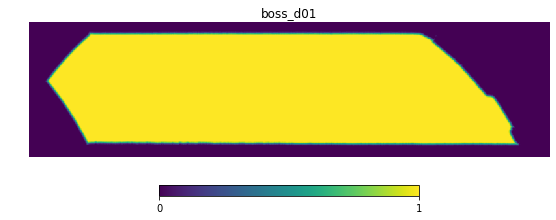

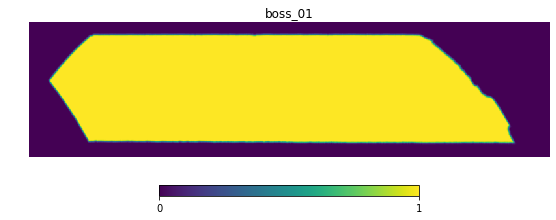

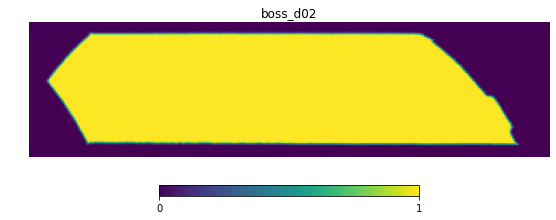

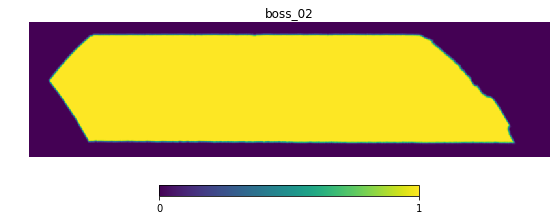

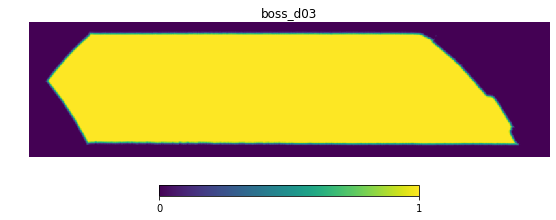

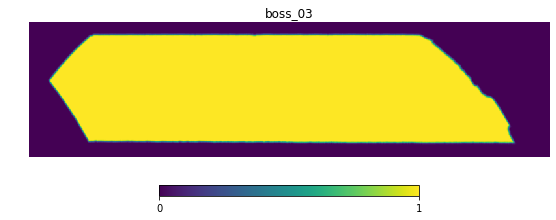

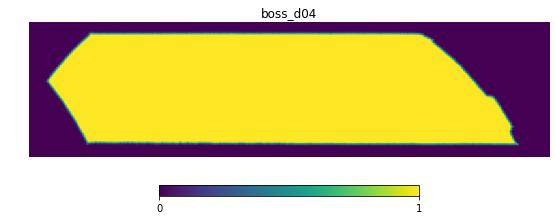

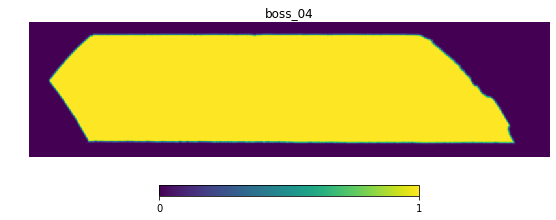

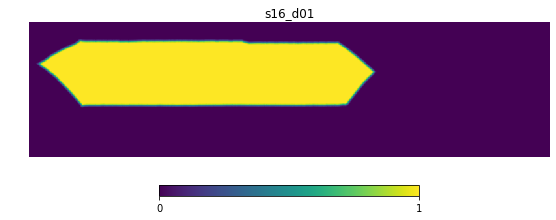

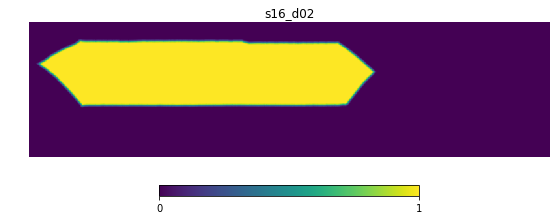

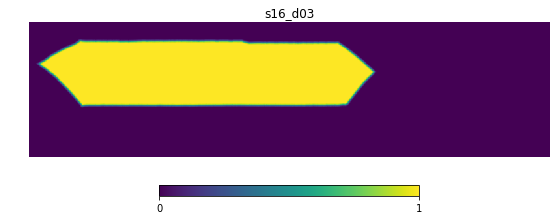

In [5]:
mask = {}
for q in qids:
    mask_iv = tools_cmb.load_mask(q,with_ivar=False)
    mask[q] = enmap.to_healpix(mask_iv[0],nside=2048)
    hp.cartview(mask[q],lonra=[143,247],latra=[-5,22],min=0,max=1,title=q)
    show()

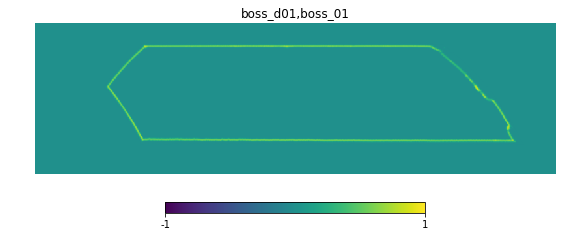

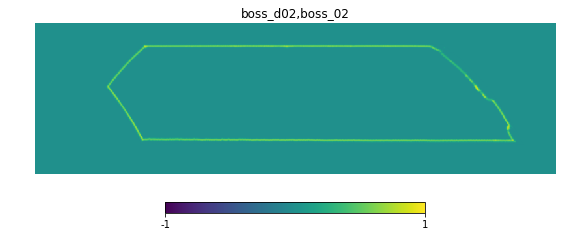

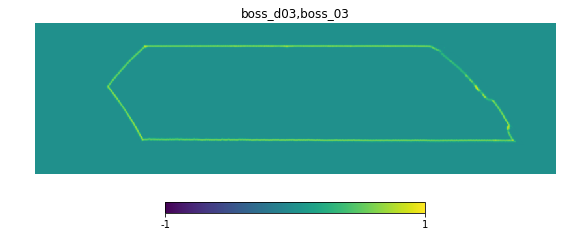

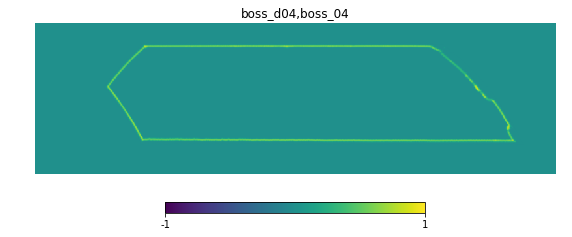

In [6]:
qid_d = ['boss_d01','boss_d02','boss_d03','boss_d04']
qid_n = ['boss_01','boss_02','boss_03','boss_04']
for qid, pid in zip(qid_d,qid_n):
    hp.cartview(mask[qid]-mask[pid],lonra=[-220,-100],latra=[-10,25],min=-1,max=1,title=qid+','+pid)
    show()

In [7]:
q = qids[0]
amask1 = hp.fitsfunc.read_map(aobj[q].amask.replace('a2.0deg','a1.0deg'))
amask5 = hp.fitsfunc.read_map(aobj[q].amask.replace('a2.0deg','a5.0deg'))

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [8]:
hp.pix2ang(2048,np.argmax(amask5),lonlat=True)

(200.36865234375, -3.658074792001983)

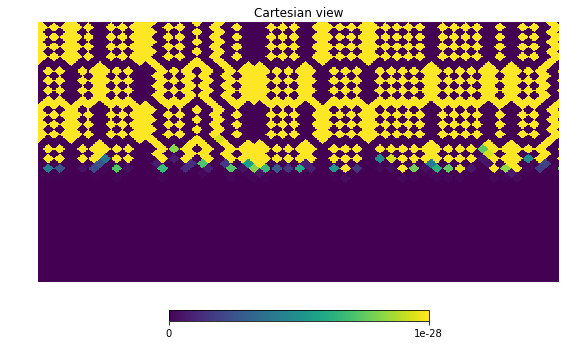

In [9]:
hp.cartview(amask5*amask1,lonra=[199,201],latra=[-4,-3],min=0,max=1e-28)

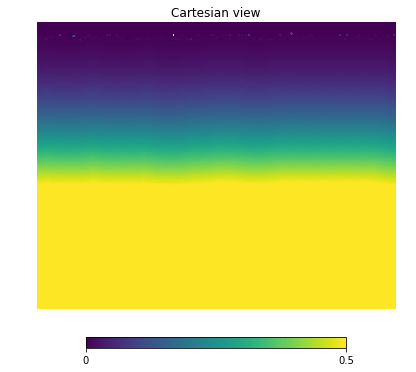

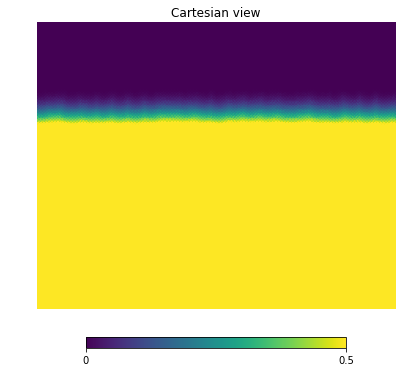

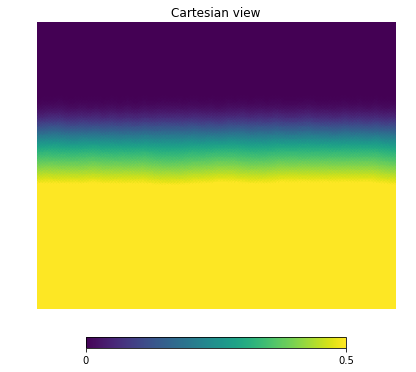

In [10]:
hp.cartview(amask5,lonra=[205,210],latra=[17,21],min=0,max=.5)
hp.cartview(amask1,lonra=[205,210],latra=[17,21],min=0,max=.5)
hp.cartview(amask5*amask1,lonra=[205,210],latra=[17,21],min=0,max=.5)

0.019549185


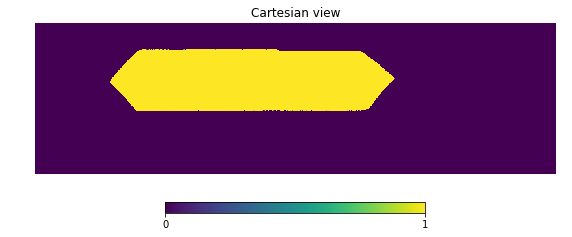

In [11]:
mask_s16 = 1.
for q in qids:  mask_s16 *= mask[q]
mask_s16 = mask_s16/(mask_s16+1e-30)
print(np.average(mask_s16))
hp.cartview(mask_s16,lonra=[-220,-100],latra=[-10,25],min=0,max=1)

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:200: FutureWarning: The default dtype of write_map() will change in a future version: explicitly set the dtype if it is important to you
  category=FutureWarning,


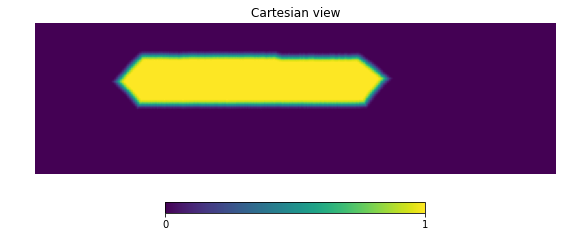

In [12]:
amask = cs.utils.apodize(2048,mask_s16,3)
hp.fitsfunc.write_map(aobj['boss_d01'].s16mask,amask,overwrite=True)
hp.cartview(amask,lonra=[-220,-100],latra=[-10,25],min=0,max=1)